In [3]:
import numpy as np
import matplotlib.pyplot as plt
# (仮の)順伝播の入力を作成
x = np.array([[1.0, -0.5], [0.0, 3.0]])
print(x)
# 0以下の要素の情報を保存
mask = (x <= 0)
print(mask)
# 順伝播の入力を複製
y = x.copy()
print(y)

# 0以下の要素を抽出
print(y[mask])
# 0以下の要素を0に置換
y[mask]=0
print(y)

[[ 1.  -0.5]
 [ 0.   3. ]]
[[False  True]
 [ True False]]
[[ 1.  -0.5]
 [ 0.   3. ]]
[-0.5  0. ]
[[1. 0.]
 [0. 3.]]


In [12]:
# ReLUレイヤの実装
class Relu:
    # 初期化メソッド
    def __init__(self):
        # 順伝播の入力における0以下の要素の情報を初期化
        self.mask = None
    
    # 順伝播メソッド
    def forward(self, x):
        # 0以下の要素の情報を保存
        self.mask = (x <= 0)
        
        # 順伝播の入力を複製
        out = x.copy()
        
        # 0以下の要素を0に置換
        out[self.mask] = 0
        return out
    
    # 逆伝播メソッド
    def backward(self, dout):
        # 順伝播時に0以下だった要素を0に置換
        dout[self.mask]=0
        
        # 複製
        dx = dout
        return dx

In [13]:
# ReLUレイヤのインスタンスを作成
layer = Relu()

# (仮の)順伝播の入力を作成
x = np.array([[1.0, -0.5], [0.0, 3.0]])
print(x)

# 順伝播を計算
y = layer.forward(x)
print(y)

[[ 1.  -0.5]
 [ 0.   3. ]]
[[1. 0.]
 [0. 3.]]


In [14]:
# (仮の)逆伝播の入力を作成
# yの配列の次元に合わせて全ての要素が1の配列を作る
dy = np.ones_like(y)
print(dy)

# 逆伝播を計算
dx = layer.backward(dy)
print(dx)

[[1. 1.]
 [1. 1.]]
[[1. 0.]
 [0. 1.]]


In [16]:
# ReLUレイヤのインスタンスを作成
layer = Relu()

# 作図用の順伝播の入力を作成
x_vals = np.arange(-3.0, 3.0, 0.01)

# 順伝播を計算
y_vals = layer.forward(x_vals)
print(np.round(y_vals[:5], 2)) # 前から5つ
print(np.round(y_vals[-5:], 2)) # 後から5つ

[0. 0. 0. 0. 0.]
[2.95 2.96 2.97 2.98 2.99]


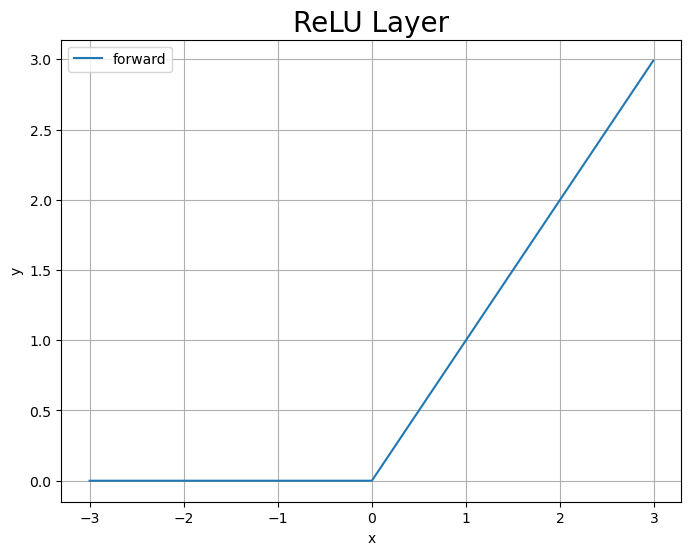

In [17]:
# 順伝播のグラフを作成
plt.figure(figsize=(8, 6)) # 図の設定
plt.plot(x_vals, y_vals, label='forward') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('y') # y軸ラベル
plt.title('ReLU Layer', fontsize=20) # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show()

In [18]:
# 作図用の逆伝播の入力を作成
dy_vals = np.ones_like(y_vals)

# 逆伝播を計算
dx_vals = layer.backward(dy_vals)
print(np.round(dx_vals[:5], 2))
print(np.round(dx_vals[-5:], 2))

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]


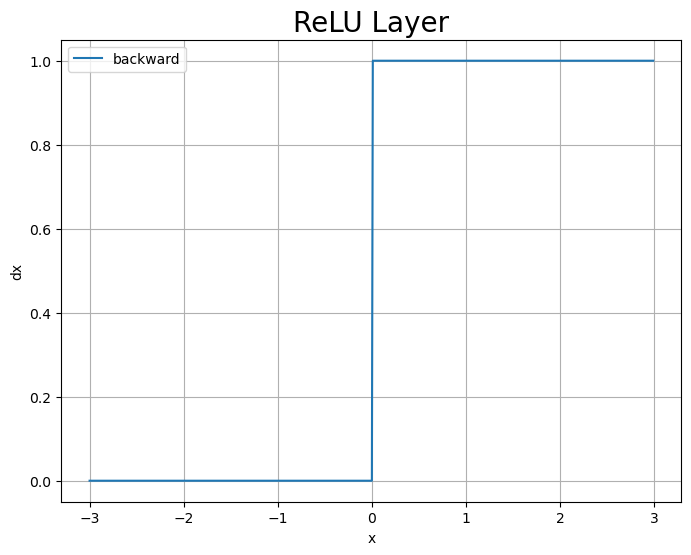

In [19]:
# 逆伝播のグラフを作成
plt.figure(figsize=(8, 6)) # 図の設定
plt.plot(x_vals, dx_vals, label='backward') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('dx') # y軸ラベル
plt.title('ReLU Layer', fontsize=20) # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show()